#### Histopathologic Cancer Detection
    - Site Location: https://www.kaggle.com/competitions/histopathologic-cancer-detection/overview
##### Student - Cole Gaito
##### University of Colorado - AI Course

In [1]:
#Basic Hello World program
#Tested on Python 3.12.4
#Ensure that the Kernel is operational
print("Hello World")

Hello World


In [2]:
#Check if Numpy is available
import sys
print(sys.executable)
import numpy as np
print(np.__version__)
print("Python executable:", sys.executable)
print("Python version:", sys.version)
!pip list

/Library/Frameworks/Python.framework/Versions/3.12/bin/python3
1.26.4
Python executable: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3
Python version: 3.12.4 (v3.12.4:8e8a4baf65, Jun  6 2024, 17:33:18) [Clang 13.0.0 (clang-1300.0.29.30)]
Package           Version
----------------- -----------
appnope           0.1.4
asttokens         2.4.1
comm              0.2.2
contourpy         1.2.1
cycler            0.12.1
debugpy           1.8.2
decorator         5.1.1
executing         2.0.1
filelock          3.15.4
fonttools         4.53.1
fsspec            2024.6.1
ipykernel         6.29.5
ipython           8.26.0
jedi              0.19.1
Jinja2            3.1.4
joblib            1.4.2
jupyter_client    8.6.2
jupyter_core      5.7.2
kiwisolver        1.4.5
MarkupSafe        2.1.5
matplotlib        3.9.1
matplotlib-inline 0.1.7
mpmath            1.3.0
nest-asyncio      1.6.0
networkx          3.3
numpy             1.26.4
packaging         24.1
pandas            2.2.2
parso     

In [3]:
#pip install numpy --upgrade

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


Now that we have imported the various objects of utilized for Pytorch and our ML Algorithims lets start building.  We will begin by creating a subclass of the Dataset called CancerDataset.

In [5]:
#Directory Locations to ease use later.
csv_file = "train_lables.csv"
root_dir = "../train/"

In [6]:
class CancerDataset(Dataset):
    #Arguements: csv_file - location of the csv file in a string format
    #            root_dir - directory with all the images in a string format
    #            transform - callable and optional toggle for a sample set
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = os.path.join(self.root_dir, self.labels_df.iloc[idx, 0] + '.tif')
        image = Image.open(img_name)
        label = self.labels_df.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [7]:
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [8]:
train_dataset = CancerDataset(csv_file='train_labels.csv', root_dir='train', transform=transform)


In [9]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [10]:
for images, labels in train_loader:
    print(images.shape)  # Should print (batch_size, 3, 96, 96)
    print(labels)        # Corresponding labels
    break  # Just to test the first batch


torch.Size([32, 3, 96, 96])
tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1])


Understanding the Output
Image Batch Shape

python
Copy code
torch.Size([32, 3, 96, 96])
[32, 3, 96, 96]:
32: This is the batch size, indicating that 32 images are being processed at once.
3: This represents the number of color channels (Red, Green, Blue) in each image.
96, 96: These are the height and width of the images, resized to 96x96 pixels as specified in your transformation pipeline.
This output confirms that the data loader is correctly batching and transforming your image data.

Labels Tensor

python
Copy code
tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1])
This tensor contains the labels for each image in the batch.
0 and 1 are binary labels, where 1 might represent the presence of cancerous cells and 0 might represent non-cancerous cells.
The tensor length is 32, matching the batch size, ensuring that each image has a corresponding label.
Verifying the Dataset Class
Your dataset class and data loader are functioning correctly, as evidenced by the output. This means:

Data Loading: Images and labels are loaded correctly from their respective paths and CSV files.
Transformations: The transformations, such as resizing and normalizing the images, are being applied properly.
Batching: The data loader is batching images and labels together as expected.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.018821478..1.08956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].


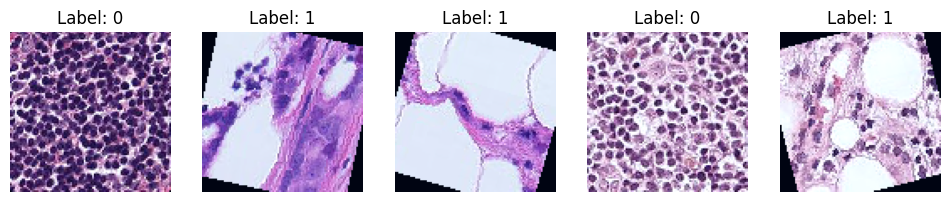

In [11]:
# Function to visualize a batch of images and labels
def show_images(images, labels, n=5):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        img = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array and permute dimensions for display
        img = img * 0.229 + 0.485  # Unnormalize if needed (adjust this based on your normalization)
        plt.imshow(img)
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.show()

# Display the first 5 images and labels from the batch
for images, labels in train_loader:
    show_images(images, labels, n=5)
    break

Explanation of the Visualization Code
permute(1, 2, 0): Changes the order of dimensions from [C, H, W] to [H, W, C] for correct visualization with matplotlib.
Unnormalize: If you normalized the images using mean and standard deviation, you may want to reverse this normalization for visualization purposes.
Loop and Plot: Loops through the first few images and plots them with their corresponding labels.